# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un vehículo en baratos y caros, teniendo en cuenta un data set que contiene información referente a todas las características recopiladas sobre los vehículos sondeados.




Carguen la base de datos preparada desde la fase 2.

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,  r2_score,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Cargo el conjunto de datos preparado
dataset_preparado = pd.read_csv("C:/Users/mjvm0/OneDrive/Documentos/Proyecto integrador/Data/dataset_preparado.csv")

Separen el dataset en X, y (variable objetivo)

In [3]:
# Separo el conjunto de datos en X, y (variable objetivo)
X = dataset_preparado.drop('price', axis=1)
y = dataset_preparado['price']

Separen el dataset en X_train, X_test, y_train y y_test

In [4]:
# Divido el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [5]:
# Instancio y entreno el modelo de regresión de árbol de decisiones
modelo_arbol = DecisionTreeRegressor(max_depth=3)
modelo_arbol.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [6]:
# Realizo predicciones en el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_test)

In [7]:
# Calculo el error cuadrático medio para evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred_arbol)
print(f"Error Cuadrático Medio: {mse}")

Error Cuadrático Medio: 11580406.946821295


In [8]:
# Convierto las predicciones a clases binarias
umbral_precio = np.mean(y)  # Puedes cambiar esto según tu criterio
y_pred_binario = (y_pred_arbol > umbral_precio).astype(int)

In [9]:
# Creo la variable binaria real
y_binario_real = (y_test > umbral_precio).astype(int)

Realicen la matriz de confusión para este modelo y comenten los resultados. 

In [10]:
# Calculo la matriz de confusión
matriz_confusion = confusion_matrix(y_binario_real, y_pred_binario)
print("Matriz de Confusión:")
print(matriz_confusion)

Matriz de Confusión:
[[26  2]
 [ 2 11]]


Los resultados muestran que:
Hay 26 vehículos clasificados como "caros" que son realmente "caros". Hay una precisión del 92.9% (26 / (26 + 2)), lo cual es bastante buena, la sensibilidad es del 92.9% (26 / (26 + 2)), lo cual es positivo, ya que es alta y nos indica que la proporción de vehículos "caros" que fueron correctamente identificados por el modelo
Hay 2 vehículos que fueron clasificados como "caros" pero son "baratos".
Hay 11 vehículos clasificados como "baratos" que son realmente "baratos".
Hay 2 vehículos que fueron clasificados como "baratos" pero son "caros".

En terminos generales estos resultados sugieren que el modelo tiene un rendimiento bastante bueno en la clasificación de vehículos como "baratos" y "caros". 

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

Recordemos  que el resultado obtenido en la matriz de confusión es:
Verdaderos Positivos (TP) nodo hijo 11,
Falsos Positivos (FP) nodo hijo  2,
Falsos Negativos (FN) nodo hijo  2,
Verdaderos Negativos (TN) nodo hijo 26

Viendo los apuntes, repasamos una breve descripción de estas métricas:

Precisión (Precisión): La precisión mide la proporción de instancias positivas identificadas correctamente entre todas las instancias que el modelo predijo como positivas.
Precisión = Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)

Recordar (Recuperación o Sensibilidad): Recuerde mide la proporción de instancias positivas identificadas correctamente entre todas las instancias positivas reales.
Recordar = Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)

Puntuación F1 (Puntuación F1): La puntuación F1 es una medida que combina precisión y recuperación en un solo número. Es útil cuando hay un desequilibrio entre las clases.
Puntuación F1 = 2 * (Precisión * Recuperación) / (Precisión + Recuperación)


In [11]:
# Defino las etiquetas reales y las predicciones binarias
y_binario_real = np.array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1])
y_pred_binario = np.array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1])

# Calculo la precisión
precision = precision_score(y_binario_real, y_pred_binario)
print(f"Precisión: {precision}")

# Calculo el recall
recall = recall_score(y_binario_real, y_pred_binario)
print(f"Recall: {recall}")

# Calculo la puntuación F1
f1 = f1_score(y_binario_real, y_pred_binario)
print(f"Puntuación F1: {f1}")


Precisión: 1.0
Recall: 1.0
Puntuación F1: 1.0


Vemos que resultado es 1.0, indica un rendimiento perfecto en la clasificación. 

Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

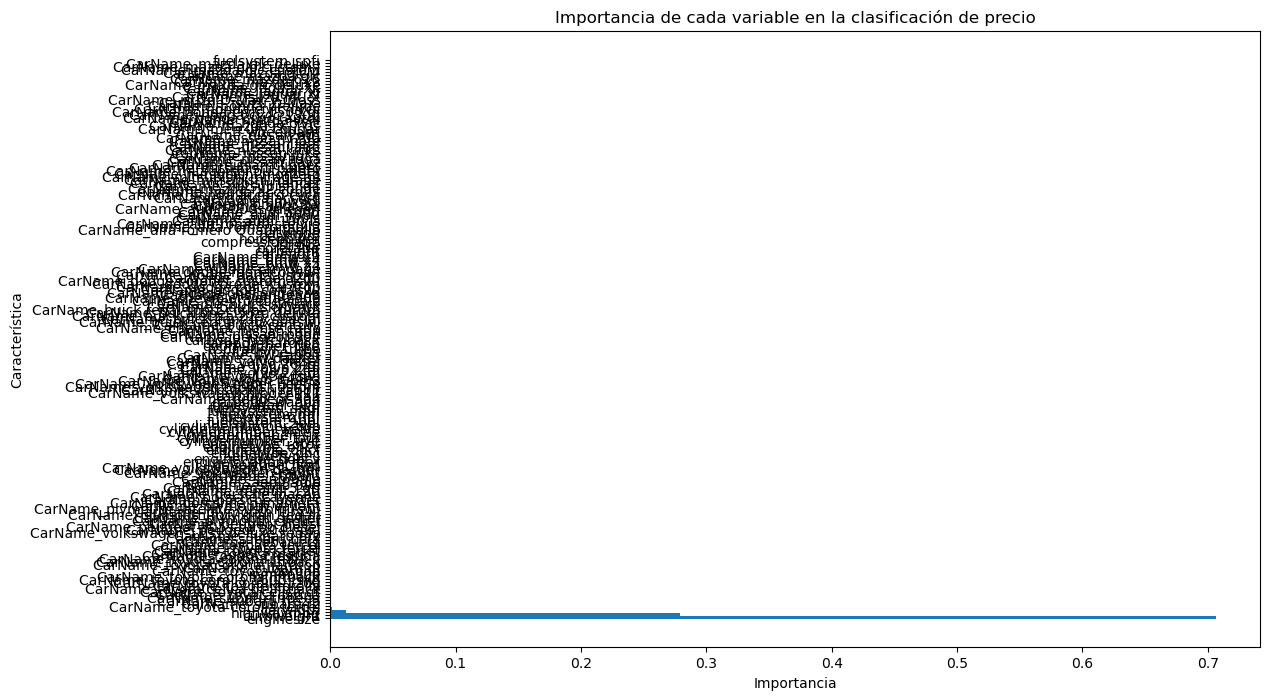

In [12]:
# Obtengo la importancia de cada característica desde el modelo de árbol
importancias = modelo_arbol.feature_importances_

# Obtengo los nombres de las características (nombres de las columnas en X)
nombres_caracteristicas = dataset_preparado.drop('price', axis=1).columns

# Creo un DataFrame para visualizar mejor
importancias_df = pd.DataFrame({'Característica': nombres_caracteristicas, 'Importancia': importancias})

# Ordeno el DataFrame por importancia en orden descendente
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Visualizo la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(importancias_df['Característica'], importancias_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de cada variable en la clasificación de precio')
plt.show()


Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [13]:
# Defino los hiperparámetros que deseas ajustar
parametros = {'max_depth': [3, 5, 7, 10, 15]}

# Instancio el modelo de árbol de decisión
modelo_arbol = DecisionTreeRegressor()

# Configuro la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(modelo_arbol, parametros, cv=5, scoring='neg_mean_squared_error')

# Ajusto el modelo a los datos
grid_search.fit(X_train, y_train)

# Obtengo el mejor valor para max_depth
mejor_max_depth = grid_search.best_params_['max_depth']
print(f'Mejor valor para max_depth: {mejor_max_depth}')

# Construyo un modelo con el mejor valor de max_depth
modelo_arbol_optimizado = DecisionTreeRegressor(max_depth=mejor_max_depth)
modelo_arbol_optimizado.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred_optimizado = modelo_arbol_optimizado.predict(X_test)

# Calculo métricas de evaluación para el modelo optimizado
mse_optimizado = mean_squared_error(y_test, y_pred_optimizado)
print(f'Error Cuadrático Medio (modelo optimizado): {mse_optimizado}')

Mejor valor para max_depth: 5
Error Cuadrático Medio (modelo optimizado): 10698884.98977119


Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [14]:
# Instancio el modelo de k-vecinos con una cantidad de vecinos arbitraria (por ejemplo, k=5)
modelo_knn = KNeighborsRegressor(n_neighbors=5)

# Entreno el modelo con los datos de entrenamiento
modelo_knn.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred_knn = modelo_knn.predict(X_test)

# Calculo el Error Cuadrático Medio para evaluar el rendimiento del modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Error Cuadrático Medio (modelo k-vecinos): {mse_knn}")


Error Cuadrático Medio (modelo k-vecinos): 18027487.38575339


Encuentre el valor óptimo para k

In [15]:
# Defino el rango de valores para k que deseas probar
parametros = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Creo el modelo de k-vecinos
modelo_knn = KNeighborsRegressor()

# Configuro la búsqueda de hiperparámetros
busqueda_knn = GridSearchCV(modelo_knn, parametros, cv=5, scoring='neg_mean_squared_error')

# Entreno el modelo con la búsqueda de hiperparámetros
busqueda_knn.fit(X_train, y_train)

# Obtengo el mejor valor para k
mejor_valor_k = busqueda_knn.best_params_['n_neighbors']
print(f"Mejor valor para k: {mejor_valor_k}")

# Obtengo el modelo con el mejor valor de k
mejor_modelo_knn = busqueda_knn.best_estimator_

# Realizo predicciones con el mejor modelo
y_pred_knn = mejor_modelo_knn.predict(X_test)

# Calculo el MSE con el mejor modelo
mse_mejor_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Error Cuadrático Medio (mejor modelo k-vecinos): {mse_mejor_knn}")


Mejor valor para k: 3
Error Cuadrático Medio (mejor modelo k-vecinos): 16826599.128387537


Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [16]:
# Selecciono las primeras 10 filas de X
X_subset = X.head(10)

# Divido el conjunto de datos en entrenamiento y prueba para k-vecinos
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_subset, y_binario_real, test_size=0.2, random_state=42)

# Imprimo tamaños de conjuntos de entrenamiento y prueba
print("Tamaño de X_train_knn:", X_train_knn.shape)
print("Tamaño de X_test_knn:", X_test_knn.shape)


Tamaño de X_train_knn: (8, 189)
Tamaño de X_test_knn: (2, 189)


In [17]:
# Instancio el modelo de k-vecinos con una cantidad de vecinos arbitraria (por ejemplo, k=5)
modelo_knn = KNeighborsRegressor(n_neighbors=3)  # Puedes ajustar k según tus necesidades

# Entreno el modelo con los datos de entrenamiento
modelo_knn.fit(X_train_knn, y_train_knn)

# Realizo predicciones en el conjunto de prueba
y_pred_knn = modelo_knn.predict(X_test_knn)

# Calculo el Error Cuadrático Medio para evaluar el rendimiento del modelo
mse_knn = mean_squared_error(y_test_knn, y_pred_knn)
print(f"Error Cuadrático Medio (modelo k-vecinos): {mse_knn}")


Error Cuadrático Medio (modelo k-vecinos): 0.11111111111111112


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

Para mejorar el rendimiento del modelo, podemos considerar las siguientes estrategias:

1. **Ajuste de Hiperparámetros:** Podemos experimentar con diferentes valores de hiperparámetros para el modelo, como la profundidad máxima del árbol de decisión o la cantidad de vecinos en k-vecinos cercanos. Se puede utilizar técnicas como la validación cruzada o la búsqueda de cuadrícula para encontrar los mejores valores de hiperparámetros.
2. **Ingeniería de Características:** Podemos examinar las características existentes y considerar si se puede crear nuevas características que capturen mejor la variabilidad en los datos. 
3. **Normalización de Datos:** Podemos asegúrarnos de que los datos estén en la misma escala. Algunos algoritmos, como los k-vecinos cercanos, son sensibles a las diferencias de escala entre las características.
4. **Exploración de Otros Modelos:** Podemos probar otros algoritmos de aprendizaje automático. 
5. **Manejo de Datos Desbalanceados:** Si la distribución de las clases es desigual, podemos considerar técnicas para manejar el desbalance, como el muestreo estratificado o el uso de métricas específicas para datos desbalanceados.
6. **Más Datos:** Si es posible, podemos obtener más datos de alta calidad para mejorar el rendimiento del modelo. 
7. **Análisis de Errores:** Podemos examinar los errores cometidos por el modelo en el conjunto de prueba. 

R/